In [20]:
#Adding all libraries 
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier

In [21]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,roc_curve,auc,recall_score,precision_score
)
from sklearn.model_selection import cross_val_score

In [22]:
# Load the all the data from CSV files 
df_original = pd.read_csv('df_original.csv')
df_clean = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_balanced.csv')


In [23]:
df.head(10)

,Date,Month,Hour,LatLon,Premis Cd,Vict Age,Vict Descent,Crime_Cat_new
0,8,1,6,13212,501,36,1,0
1,1,1,1,20466,102,25,3,0
2,16,9,3,7239,502,62,1,0
3,1,1,5,36772,502,76,2,0
4,1,1,1,43900,409,31,4,0
5,1,1,1,20252,735,25,3,1
6,2,1,4,21207,404,23,3,0
7,4,1,1,20148,726,39,4,0
8,4,1,1,25557,502,23,1,0
9,12,9,1,2889,101,21,1,0


In [24]:
# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=1)

# Save the subsets to separate CSV files
train_data.to_csv('train_balanced.csv', index=False)
test_data.to_csv('test_balanced.csv', index=False)


# Separate features and target variable for training data
x_train = train_data.drop(["Crime_Cat_new"], axis=1)
y_train = train_data["Crime_Cat_new"]

# Separate features and target variable for testing data
x_test = test_data.drop(["Crime_Cat_new"], axis=1)
y_test = test_data["Crime_Cat_new"]

In [25]:
#Faced issue earlier that there was discrepancy in the number of rows
#Hence, checking the shape of the datasets. 
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (322334, 7)
y_train (322334,)
x_test (138144, 7)
y_test (138144,)


In [26]:
#checking if there are any null values 
x_train.isnull().sum()

Date            0
Month           0
Hour            0
LatLon          0
Premis Cd       0
Vict Age        0
Vict Descent    0
dtype: int64

In [27]:
x_test.isnull().sum()

Date            0
Month           0
Hour            0
LatLon          0
Premis Cd       0
Vict Age        0
Vict Descent    0
dtype: int64

In [28]:
#Creating separate X and Y 
x = df.drop(["Crime_Cat_new"], axis=1)
y = df.Crime_Cat_new.values

## Data Analysis - Part 1 
In this part, our output category has 6 values. We will perform all analysis for this particular thing. 

In [29]:
#labels & classes 
labels = [0,1,2,3,4,5]
classes = [0,1,2,3,4,5]

## Cost Matrix 
cost_matrix = np.array([[10,-10,-10,-5,-5,-1],  # a: Cost of True Positive, b: Cost of False Negative
                        [-1,15,-5,-10,-10,-10], 
                        [-10,-1,15,-10,-5,-10],
                        [-5,-5,-5,10,-1,-1],
                        [-5,-10,-10,-5,10,-5],
                        [-1,-10,-10,-5,-1,10]]) # c: Cost of False Positive, d: Cost of True Negative

In [30]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

### Naive Bayes

In [31]:
'''We will look into Naive Bayes models 
1. Multinomial Naive Bayes - MultinomialNB
2. Gaussian Naive Bayes - GaussianNB
3. Complement Naive Bayes - ComplementNB
4. Bernoulli Naive Bayes - BernoulliNB

'''
#Defining all the models as a dictionary
NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

#for every model in NB model, we will run all the code to calculate everything in one go 
#took reference from ensemble learning code. 

for name, classifier in NB_models.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)


TEST ACCURACY  MultinomialNB  is : 0.5326181375955524
TRAIN ACCURACY MultinomialNB  is : 0.533142640863204
EXPECTED VALUE  MultinomialNB  is : 576546
___________________________
TEST ACCURACY  GaussianNB  is : 0.6966643502432245
TRAIN ACCURACY GaussianNB  is : 0.6953408576197361
EXPECTED VALUE  GaussianNB  is : 962666
___________________________
TEST ACCURACY  ComplementNB  is : 0.5325964211257818
TRAIN ACCURACY ComplementNB  is : 0.533142640863204
EXPECTED VALUE  ComplementNB  is : 576482
___________________________
TEST ACCURACY  BernoulliNB  is : 0.49871872828353025
TRAIN ACCURACY BernoulliNB  is : 0.5004777652993478
EXPECTED VALUE  BernoulliNB  is : 617526
___________________________


### Decision Trees

In [32]:
'''
In this section, we will look at decision tree models

1. tree.DecisionTreeClassifier(criterion='gini', random_state=42)
2.  tree.DecisionTreeClassifier(criterion='entropy', random_state=42) 
3.Extremely Randomized Trees
4. Random Forest - RandomForestClassifier(random_state=42)
'''

Tree_models_42 = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}

#took reference from ensemble learning code. 

for name, classifier in Tree_models_42.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.8506051656242761
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  GiniTree_NoEstimators  is : 1346866
___________________________
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.8566278665740097
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1362438
___________________________
TEST ACCURACY  RandomForest  is : 0.8827744961779013
TRAIN ACCURACY RandomForest  is : 0.9998945193494946
EXPECTED VALUE  RandomForest  is : 1426694
___________________________
TEST ACCURACY  ExtraTrees_Gini  is : 0.8737114894602733
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9999038264657157
EXPECTED VALUE  ExtraTrees_Gini  is : 1404458
___________________________
TEST ACCURACY  ExtraTrees_Entropy  is : 0.8736535788742182
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9999038264657157
EXPECTED VALUE  ExtraTrees_Entropy  is : 1404042
___________________________


Up until now, Random forest give us the best results with maximum EV. Now let's try to improve the performances of these models. 

* We will do pre-pruning and post pruning to see improvements. 
* After that for both the types of models, we will perform cross validation. 

In [33]:
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
gcv = GridSearchCV(estimator=classifier, param_grid=params)
gcv.fit(x_train, y_train)

modelgcv = gcv.best_estimator_
print("Best Fit Model:", modelgcv)

modelgcv.fit(x_train, y_train)

# Predictions
y_pred = modelgcv.predict(x_test)
y_pred_train = modelgcv.predict(x_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Calculating Expected Value
EV = np.sum(cm * cost_matrix)

# Calculating other scores
#f1 = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass
#Precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass

# Printing results
print("TEST ACCURACY is:", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY is:", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE is:", EV)
#print("F-1 SCORE is:", f1)
#print("RECALL is:", Recall)
#print("PRECISION is:", Precision)

Best Fit Model: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
TEST ACCURACY is: 0.7145659601575168
TRAIN ACCURACY is: 0.7134463010417765
EXPECTED VALUE is: 973274


In [34]:
# Pre-pruning 
for name, classifier in Tree_models_42.items():
    
    # parameters 
    params = {'max_depth': [2,4,6],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [2,3]}
    
    
    gcv = GridSearchCV(estimator=classifier,param_grid=params)
    gcv.fit(x_train,y_train)

    modelgcv = gcv.best_estimator_
    print("Best Fit Model for", name, modelgcv)
    

    modelgcv.fit(x_train,y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

Best Fit Model for GiniTree_NoEstimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)
TEST ACCURACY  GiniTree_NoEstimators  is : 0.8506051656242761
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  GiniTree_NoEstimators  is : 1346866
___________________________
Best Fit Model for EntropyTree_NoEstimators DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.8566278665740097
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1362438
___________________________


KeyboardInterrupt: 

In [ ]:
#Post Pruning 
Tree_models_new = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'GiniTree_BestGCV' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42), 
    'EntropyTree_BestGCV' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42),
    #'RandomForest' : RandomForestClassifier(random_state=42),
    #'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    #'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}
for name, model in Tree_models_new.items():
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    print(name)
    print(ccp_alphas)
    print(ccp_alphas.shape)
    print(max(ccp_alphas))
    ccp_alphas2 = np.arange(0,max(ccp_alphas),0.001)
    print("______________________")


GiniTree_NoEstimators
[0.00000000e+00 7.92919231e-07 9.91149039e-07 ... 4.93041648e-03
 8.72985412e-03 1.65595211e-02]
(29771,)
0.01655952108755443
______________________
EntropyTree_NoEstimators
[0.00000000e+00 0.00000000e+00 2.91531620e-06 ... 1.87701065e-02
 2.37406125e-02 3.69087818e-02]
(35867,)
0.0369087818441769
______________________
GiniTree_BestGCV
[0.00000000e+00 2.47787260e-06 4.96968358e-06 5.73450515e-06
 7.40257044e-06 1.08466473e-05 1.22663708e-05 1.39560485e-05
 1.40698645e-05 1.71236426e-05 1.98921854e-05 2.08072881e-05
 3.72813971e-05 4.13179880e-05 4.20499272e-05 4.46237536e-05
 5.61059810e-05 6.08776508e-05 6.68742064e-05 7.63323756e-05
 1.33876859e-04 1.38260724e-04 1.41536566e-04 1.48984408e-04
 1.64914190e-04 1.89244270e-04 2.26545940e-04 2.59934658e-04
 2.77007229e-04 2.81236230e-04 3.09830851e-04 3.22618844e-04
 3.46159853e-04 4.53185859e-04 5.10837198e-04 5.43700678e-04
 6.08397065e-04 6.15029917e-04 6.56621020e-04 6.67005443e-04
 7.97188541e-04 8.11208939e-0

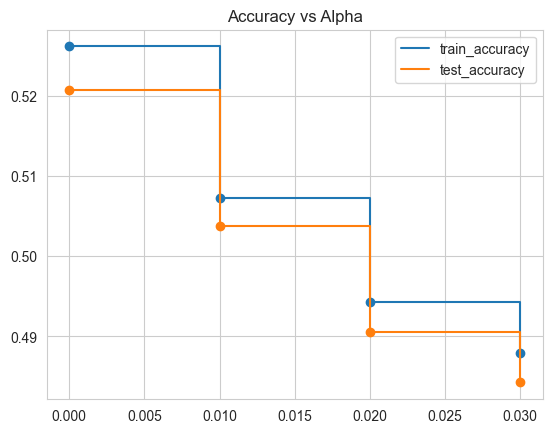

In [ ]:
#For Entropy Tree GCV 
ccp_alphas2 = np.arange(0,0.037,0.01)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [ ]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.5207376469119014
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.5261217329249799
EXPECTED VALUE  EntropyTree_BestGCV  is : 248703
___________________________


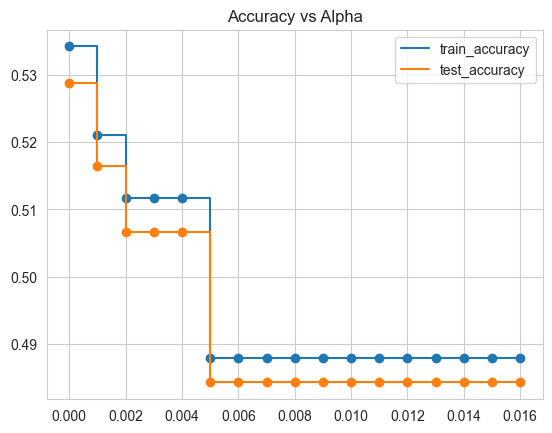

In [ ]:
#Gini GCV model
ccp_alphas2 = np.arange(0,0.0167,0.001)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [ ]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.5288550931771824
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.534209509083881
EXPECTED VALUE  EntropyTree_BestGCV  is : 282219
___________________________


Stratified sampling for all the models 

### Stratified Sampling

#### Stratified Sampling - Naive Bayes Models

In [35]:
#Creating stratified sample 

stratified_sample =  StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Empty list to maintain all the scores
scores = []

#For loops for all calculations 
for model_name,model in NB_models.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5344
Fold 2: Accuracy: 0.5340
Fold 3: Accuracy: 0.5349
Fold 4: Accuracy: 0.5337
Fold 5: Accuracy: 0.5335
Fold 6: Accuracy: 0.5296
Fold 7: Accuracy: 0.5326
Fold 8: Accuracy: 0.5334
Fold 9: Accuracy: 0.5341
Fold 10: Accuracy: 0.5350
Average Score for MultinomialNB is 0.5335108343824698
Fold 1: Accuracy: 0.5344
Fold 2: Accuracy: 0.5340
Fold 3: Accuracy: 0.5349
Fold 4: Accuracy: 0.5337
Fold 5: Accuracy: 0.5335
Fold 6: Accuracy: 0.5296
Fold 7: Accuracy: 0.5326
Fold 8: Accuracy: 0.5334
Fold 9: Accuracy: 0.5341
Fold 10: Accuracy: 0.5350
Fold 11: Accuracy: 0.6956
Fold 12: Accuracy: 0.6954
Fold 13: Accuracy: 0.6944
Fold 14: Accuracy: 0.6971
Fold 15: Accuracy: 0.6931
Fold 16: Accuracy: 0.6956
Fold 17: Accuracy: 0.6951
Fold 18: Accuracy: 0.6967
Fold 19: Accuracy: 0.6974
Fold 20: Accuracy: 0.6968
Average Score for GaussianNB is 0.6146167729804516
Fold 1: Accuracy: 0.5344
Fold 2: Accuracy: 0.5340
Fold 3: Accuracy: 0.5349
Fold 4: Accuracy: 0.5337
Fold 5: Accuracy: 0.5335
Fold 6: 

#### Stratified Sampling - Tree Models

In [36]:
#For loops for all calculations 
for model_name,model in Tree_models_42.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5344
Fold 2: Accuracy: 0.5340
Fold 3: Accuracy: 0.5349
Fold 4: Accuracy: 0.5337
Fold 5: Accuracy: 0.5335
Fold 6: Accuracy: 0.5296
Fold 7: Accuracy: 0.5326
Fold 8: Accuracy: 0.5334
Fold 9: Accuracy: 0.5341
Fold 10: Accuracy: 0.5350
Fold 11: Accuracy: 0.6956
Fold 12: Accuracy: 0.6954
Fold 13: Accuracy: 0.6944
Fold 14: Accuracy: 0.6971
Fold 15: Accuracy: 0.6931
Fold 16: Accuracy: 0.6956
Fold 17: Accuracy: 0.6951
Fold 18: Accuracy: 0.6967
Fold 19: Accuracy: 0.6974
Fold 20: Accuracy: 0.6968
Fold 21: Accuracy: 0.5344
Fold 22: Accuracy: 0.5340
Fold 23: Accuracy: 0.5349
Fold 24: Accuracy: 0.5337
Fold 25: Accuracy: 0.5335
Fold 26: Accuracy: 0.5296
Fold 27: Accuracy: 0.5326
Fold 28: Accuracy: 0.5334
Fold 29: Accuracy: 0.5341
Fold 30: Accuracy: 0.5350
Fold 31: Accuracy: 0.4999
Fold 32: Accuracy: 0.4997
Fold 33: Accuracy: 0.5002
Fold 34: Accuracy: 0.4999
Fold 35: Accuracy: 0.4998
Fold 36: Accuracy: 0.5000
Fold 37: Accuracy: 0.4994
Fold 38: Accuracy: 0.4999
Fold 39: Accuracy: 0.

KeyboardInterrupt: 

### Ensemble Learning 

Ensemble learning 
* Simple averaging 
* Boosting 
* Bagging 

#### Simple Averaging

In [ ]:
x_train.shape

(168155, 14)

In [ ]:
y_train.shape

(216200,)

In [37]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

for name, classifier in models_dict.items():
    #fit the model 
    classifier.fit(x_train, y_train)
    #make prediciton 
    #Calculating all the predicitons 
    y_pred = classifier.predict(x_test)
    y_pred_train =  classifier.predict(x_train)
    
    #confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.8506051656242761
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  GiniTree_NoEstimators  is : 1346866
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.8566278665740097
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1362438
TEST ACCURACY  ExtraTrees_Gini  is : 0.8737114894602733
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9999038264657157
EXPECTED VALUE  ExtraTrees_Gini  is : 1404458
TEST ACCURACY  ExtraTrees_Entropy  is : 0.8736535788742182
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9999038264657157
EXPECTED VALUE  ExtraTrees_Entropy  is : 1404042
TEST ACCURACY  MultinomialNB  is : 0.5326181375955524
TRAIN ACCURACY MultinomialNB  is : 0.533142640863204
EXPECTED VALUE  MultinomialNB  is : 576546
TEST ACCURACY  GaussianNB  is : 0.6966643502432245
TRAIN ACCURACY GaussianNB  is : 0.6953408576197361
EXPECTED VALUE  GaussianNB  is : 962666
TEST ACCURACY  Complem

In [38]:
#HARD VOTING
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


model = VotingClassifier(estimators=[('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())], voting='hard')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)

Train accuracy:  0.9158357480129307
Test accuracy:  0.8182041927264304
Expected Value:  1298066


In [39]:
#SOFT VOTING
model = VotingClassifier(estimators=models_dict_2, voting='soft')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)


Train accuracy:  0.9998976217215683
Test accuracy:  0.8525741255501506
Expected Value:  1352574


#### Bagging

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  MultinomialNB  is : 0.5326036599490387
TRAIN ACCURACY MultinomialNB  is : 0.5331457432352777
EXPECTED VALUE  MultinomialNB  is : 576510
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GaussianNB  is : 0.6966860667129952
TRAIN ACCURACY GaussianNB  is : 0.6953687789683992
EXPECTED VALUE  GaussianNB  is : 962710
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ComplementNB  is : 0.5326181375955524
TRAIN ACCURACY ComplementNB  is : 0.533142640863204
EXPECTED VALUE  ComplementNB  is : 576538
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  BernoulliNB  is : 0.49871872828353025
TRAIN ACCURACY BernoulliNB  is : 0.5004777652993478
EXPECTED VALUE  BernoulliNB  is : 617526
___________________________
Train accuracy of RandomForest algo:  0.9999038264657157
Test accuracy of RandomForest algo:  0.8824125550150568
Expected Value of RandomForest algo:  1425798


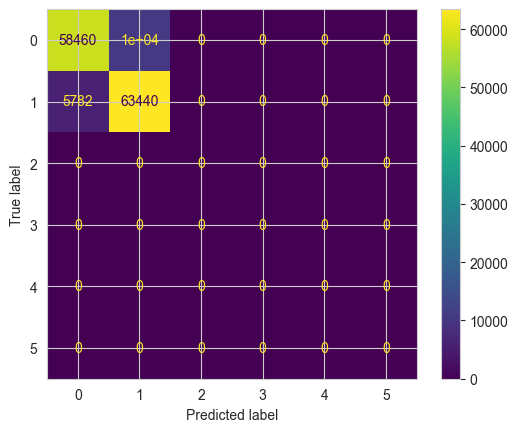

In [40]:
#### Bagging for Naives Bayes models 

from sklearn.ensemble import BaggingClassifier

for name, classifier in NB_models.items():
    
    model = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)



# Bagging with Random Forest Classifier 
# Build a Gaussian Classifier
modelMNB = RandomForestClassifier()
modelMNB.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelMNB.predict(x_test)
y_pred_train =  modelMNB.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelMNB.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelMNB.predict(x_test))

#Confusion matrix 
labels = [0,1,2,3,4,5]
classes = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of RandomForest algo: ", mnb_train_accuracy)
print("Test accuracy of RandomForest algo: ", mnb_test_accuracy)
print("Expected Value of RandomForest algo: ", EV_MNB)



#### Boosting

In [41]:
#Adaboost for all our models 
from sklearn.ensemble import AdaBoostClassifier

for name, classifier in models_dict.items():
    
    model = AdaBoostClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GiniTree_NoEstimators  is : 0.9095436645818855
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  GiniTree_NoEstimators  is : 1494306
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  EntropyTree_NoEstimators  is : 0.9115850127403289
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9999038264657157
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1499522
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#XGBoost 
import xgboost as xgb

# Build a Gaussian Classifier
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)
modelXG.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelXG.predict(x_test)
y_pred_train =  modelXG.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelXG.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelXG.predict(x_test))

#Confusion matrix 
labels = [0,1,2,3,4,5]
classes = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of XGBoost algo: ", mnb_train_accuracy)
print("Test accuracy of XGBoost algo: ", mnb_test_accuracy)
print("Expected Value of XGBoost algo: ", EV_MNB)


## Feature Selection - Data analysis Part 2

Further improve accuracy by first feature selection - keeping only relevant features 
* For NB methods - simple + stratified 
* For tree methods - simple, pre-prune, post prune
* Ensemble - simple, boosting, bagging

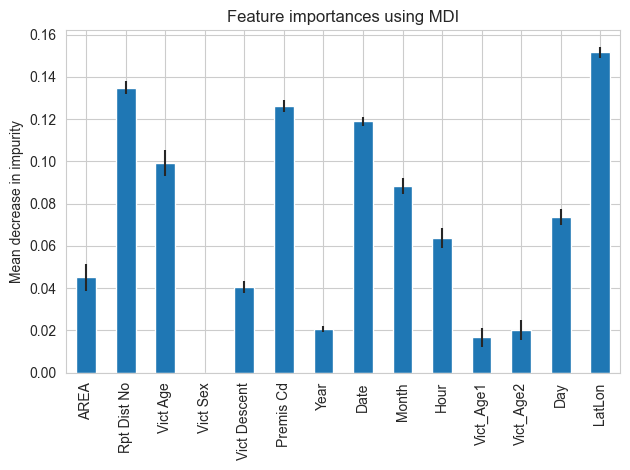

In [ ]:
#Selecting features part 1 - using feature importances

# storing the feature names in a list
feature_names_from_dataset = df.columns.drop('Crime_Category').tolist()
feature_names_from_dataset

#rf model 
rf_model= RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)

#Calculating importance of all features and plotting them
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index = feature_names_from_dataset)
# print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

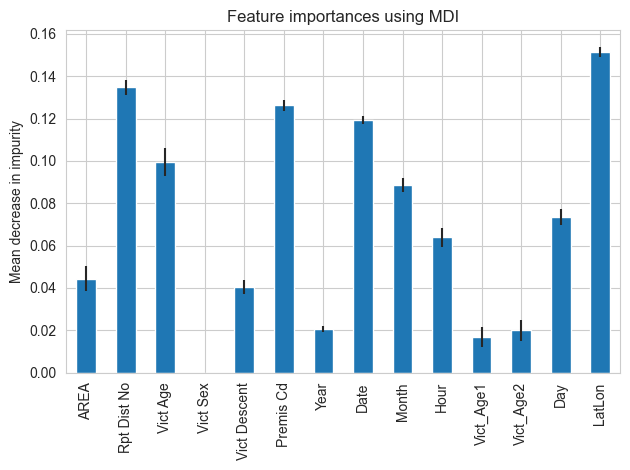

In [ ]:

# storing the feature names in a list
feature_names_from_dataset = df.columns.drop('Crime_Category').tolist()
feature_names_from_dataset

#rf model 
rf_model= RandomForestClassifier(n_estimators = 300)
rf_model.fit(x_train, y_train)

#Calculating importance of all features and plotting them
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index = feature_names_from_dataset)
# print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
x_train.columns



Index(['AREA', 'Rpt Dist No', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Year', 'Date', 'Month', 'Hour', 'Vict_Age1', 'Vict_Age2',
       'Day', 'LatLon'],
      dtype='object')

Guassian NB gave highest accuracy, so we will do feature selection according to it. 

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs = SequentialFeatureSelector(modelGB, n_features_to_select=3, direction=”forward”)
sfs.fit(x_train, y_train)
X_selection = sfs.transform(X)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
modelGB= GaussianNB()

modelGB_forward=sfs(modelGB,n_features_to_select=10, direction="forward")
modelGB_forward.fit(x_train,y_train)

# Get the column names for the selected features
selected_features = modelGB_forward.get_feature_names_out()
print(selected_features)

#modelGB_forward_r2=sfs(modelGB,n_features_to_select=8, direction="forward",scoring='callable')
#modelGB_forward_r1.fit(x_train,y_train)
#Get the column name for the selected feature.
#modelGB_forward_r1.k_feature_names_


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * 

['Vict Sex' 'Vict Descent' 'Premis Cd' 'Year' 'Date' 'Month' 'Hour'
 'Vict_Age1' 'Vict_Age2' 'LatLon']


In [ ]:
modelGB_back=sfs(modelGB,n_features_to_select=10, direction="backward")
modelGB_back.fit(x_train,y_train)

# Get the column names for the selected features
selected_features = modelGB_back.get_feature_names_out()
print(selected_features)

['Rpt Dist No' 'Vict Descent' 'Premis Cd' 'Year' 'Date' 'Month' 'Hour'
 'Vict_Age1' 'Day' 'LatLon']


Based on this, we will trim our features and drop the remaining features. 

For trees - 'Rpt Dist No', 'Vict Age','Premis Cd''Date', 'Month', 'Hour' ,'Day', 'LatLon'
For NB models - 'Vict Descent' 'Premis Cd' 'Year' 'Date' 'Month' 'Hour'
 'Vict_Age1''LatLon'

 Both - 'Date', 'Month', 'Hour', 'LatLon', 'Premis Cd', 'Vict Age', 'Vict Descent'

In [ ]:
df.head(5)

,AREA,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Premis Cd,Crime_Category,Year,Date,Month,Hour,Vict_Age1,Vict_Age2,Day,LatLon
0,3,377,36,0,1,501,1,2020,8,1,6,3,3,3,13212
1,1,163,25,0,3,102,1,2020,1,1,1,2,1,3,20466
2,12,1259,62,0,1,502,0,2020,16,9,3,4,5,3,7239
3,15,1543,76,0,2,502,0,2020,1,1,5,5,5,3,36772
4,19,1998,31,0,4,409,0,2020,1,1,1,3,2,3,43900


In [ ]:
df_trim = df [['Date', 'Month', 'Hour', 'LatLon', 'Premis Cd', 'Vict Age', 'Vict Descent','Crime_Category']]

In [ ]:
df_trim['Crime_Cat_new'].value_counts()

Crime_Cat_new
0    240222
Name: count, dtype: int64

## Data analysis Part 3 - Reducing Categories + Features

Maybe due to multi classes of the output, we have this issue. Maybe we can reduce the classes of the output and see how it can categorize well. Classifying it into crimes where you cna get hurt vs where you can't get hurt. 

In [ ]:
# Create conditional DataFrame column by lambda.
# 1 is basically all the events where you can get seriously hurt
# 0 is the event where you won't get seriously hurt

df_trim = df [['Date', 'Month', 'Hour', 'LatLon', 'Premis Cd', 'Vict Age', 'Vict Descent','Crime_Category']]

df_trim['Crime_Cat_new'] = df_trim.Crime_Category.map(lambda x: 1 if (x == 2 or x == 4) else 0)

df_trim['Crime_Cat_new'].value_counts()

/var/folders/hz/ws3q5b8d38q_zyr3p29kkh0c0000gn/T/ipykernel_65751/1839291075.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['Crime_Cat_new'] = df_trim.Crime_Category.map(lambda x: 1 if (x == 2 or x == 4) else 0)


Crime_Cat_new
0    230239
1      9983
Name: count, dtype: int64

In [ ]:
# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df_trim, test_size=0.3, random_state=1)

# Save the subsets to separate CSV files
train_data.to_csv('train_part3.csv', index=False)
test_data.to_csv('test_part3.csv', index=False)
df_trim.to_csv('df_trim.csv', index=False) 


# Separate features and target variable for training data
x_train_new = train_data.drop(["Crime_Category","Crime_Cat_new"], axis=1)
y_train_new = train_data["Crime_Cat_new"]

# Separate features and target variable for testing data
x_test_new = test_data.drop(["Crime_Category","Crime_Cat_new"], axis=1)
y_test_new = test_data["Crime_Cat_new"]

In [ ]:
df_trim.head(4)

,Date,Month,Hour,LatLon,Premis Cd,Vict Age,Vict Descent,Crime_Category,Crime_Cat_new
0,8,1,6,13212,501,36,1,1,0
1,1,1,1,20466,102,25,3,1,0
2,16,9,3,7239,502,62,1,0,0
3,1,1,5,36772,502,76,2,0,0
